Sample 1 - Accuracy: 0.6540156709108716, Parameters: {'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 2, 'criterion': 'gini'}
Sample 2 - Accuracy: 0.8966699314397649, Parameters: {'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}
Sample 3 - Accuracy: 0.8041136141038198, Parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'entropy'}
Sample 4 - Accuracy: 0.901077375122429, Parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'gini'}
Sample 5 - Accuracy: 0.8981390793339863, Parameters: {'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 4, 'criterion': 'entropy'}
Sample 6 - Accuracy: 0.9113614103819785, Parameters: {'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'criterion': 'entropy'}
Sample 7 - Accuracy: 0.8996082272282077, Parameters: {'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'gini'}
Sample 8 - Accuracy: 

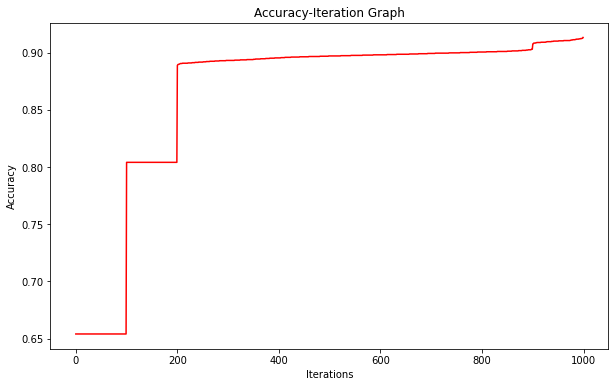

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_excel("Dry_Bean_Dataset.xlsx")

iterations = 100
num_samples = 10

best_params = {}
best_accuracy = 0
best_model = None
all_accuracies = []

for sample in range(num_samples):
    train, test = train_test_split(dataset, test_size=0.3)
    X_train = train.drop('Class', axis=1)  
    y_train = train['Class']  
    X_test = test.drop('Class', axis=1)  
    y_test = test['Class'] 

    random_params = {
        'max_depth': np.random.randint(1, 20),  
        'min_samples_split': np.random.randint(2, 10),  
        'min_samples_leaf': np.random.randint(1, 5),
        'criterion': np.random.choice(['gini', 'entropy'])  
    }
    
    model = DecisionTreeClassifier(**random_params)
    model.fit(X_train, y_train)
    
    accuracy_over_iterations = []
    for i in range(iterations):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_over_iterations.append(accuracy)
    
    all_accuracies.extend(accuracy_over_iterations)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = random_params
        best_model = model
    
    print(f"Sample {sample+1} - Accuracy: {accuracy}, Parameters: {random_params}")

all_accuracies.sort()
print("\nBest Parameters:", best_params)
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples*iterations), all_accuracies, color='red')
plt.title('Accuracy-Iteration Graph')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()